# Graficación bidimensional del potencial y campo eléctrico
Víctor A. Bettachini
bettachini@df.uba.ar
190102

In [1]:
## bibliotecas de funciones a utilizar

In [2]:
import numpy as np # álgebra lineal y otras funciones de aplicación científica
import pandas as pd # estucturas y análisis de datos
import matplotlib.pyplot as plt # funciones de graficación

In [3]:
## Importación de los datos

In [4]:
potencial = pd.read_excel('./potencial.xls', index_col='y[cm]') # lee un archivo de M$ Excel con columna 'y[cm]'
potencial

0     2     4     6     8
y[cm]                              
8      2.33  1.33  1.33  1.33  1.33
6      1.33  2.00  3.00  2.00  1.33
4      1.33  3.00  4.00  3.00  1.33
2      1.33  2.00  3.00  2.00  1.33
0      1.33  1.33  1.33  1.33  1.33

## Graficación de las líneas equipotenciales

In [5]:
x = potencial.columns.values # vector con los valores de los nombres de columnas
y = potencial.index.values # vector con los valores de las filas

In [6]:
X, Y = np.meshgrid(x, y) # grillas bidimensionales con los x e y correspondientes
Y

array([[8, 8, 8, 8, 8],
       [6, 6, 6, 6, 6],
       [4, 4, 4, 4, 4],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0]], dtype=int64)

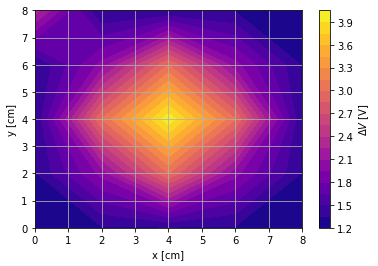

In [7]:
niveles = 20 # cuantos niveles queremos diferenciar en la figura

fig, ax = plt.subplots()
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.grid()
fog = ax.contourf(X,Y,potencial, niveles,cmap='plasma') # usa la variable 'fog' para designar el mapa de colores 
# cmap: mapas de colores: https://matplotlib.org/examples/color/colormaps_reference.html
fig.colorbar(fog, ax=ax, label='$\Delta V$ [V]') # asigna la barra de colores al mapa del potencial

In [8]:
fig.savefig('capo.svg')

Lo que quiero ahora es que calcule los gradientes usando el paso de medición y luego que dibuje los vectores del campo calculados.
[https://stackoverflow.com/questions/25342072/computing-and-drawing-vector-fields]

## Graficar las líneas del campo eléctrico
Como $\vec{E} = - \vec{\nabla} V = - \left( \frac{\partial{V}}{\partial x} \hat{x} + \frac{\partial{V}}{\partial y} \hat{y} \right)$ podemos dibujar hacia adonde apunta el campo.
Es fácil estimar los gradientes discretos como $\frac{V_{i+1} - V_i}{x_{i+1}- x_i}$. A esto se llama aproximar una derivida por diferencias finitas. El comando _gradient_ hace algo más fino, calcula la diferencia central de segundo orden, esto es contemplando para estimar el gradiente en $x_i$ los valores en los vecinos de $V$ ($V_{i+1}, V_{i-1}$).

In [9]:
# Estimar el campo
gr_y, gr_x = np.gradient(potencial)
gr_x = -gr_x # OJO, como recorremos en y la matriz de arriba hacia abajo hay que invertir el signo de gr_y
potencial, gr_x

(          0     2     4     6     8
 y[cm]                              
 8      2.33  1.33  1.33  1.33  1.33
 6      1.33  2.00  3.00  2.00  1.33
 4      1.33  3.00  4.00  3.00  1.33
 2      1.33  2.00  3.00  2.00  1.33
 0      1.33  1.33  1.33  1.33  1.33,
 array([[ 1.   ,  0.5  , -0.   , -0.   , -0.   ],
        [-0.67 , -0.835, -0.   ,  0.835,  0.67 ],
        [-1.67 , -1.335, -0.   ,  1.335,  1.67 ],
        [-0.67 , -0.835, -0.   ,  0.835,  0.67 ],
        [-0.   , -0.   , -0.   , -0.   , -0.   ]]))

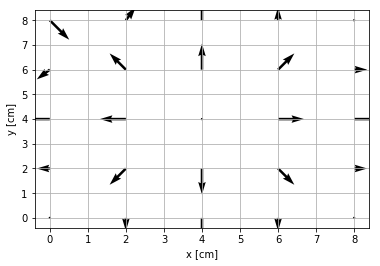

In [10]:
# graficar las líneas de campo
plt.grid() # grilla
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.quiver(X, Y, gr_x, gr_y) # OJO, componente del vector en y antes de en x # https://stackoverflow.com/questions/11993790/inverted-order-of-numpy-array-gradient-and-matplotlib-quiver
plt.savefig('./vectores.svg') # exporta una imagen vectorial

Utilizando los mismos datos se puede utilizar la función _streamplot_ que une principio y fin de flechas subsiguientes para lograr una más clara representación visual del campo $\vec{E}$.

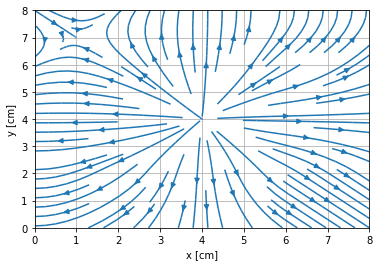

In [11]:
plt.grid() # grilla
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.streamplot(X, Y, gr_x, gr_y)

Ahora probamos una integración de curvas de nivel del potencial y las línes del campo eléctrico.

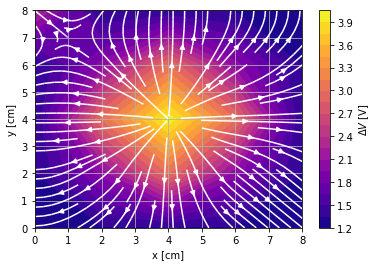

In [12]:
fig, ax = plt.subplots()
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.grid()
fog = ax.contourf(X,Y,potencial, niveles,cmap='plasma') # usa la variable 'fog' para designar el mapa de colores 
ax.streamplot(X, Y, gr_x, gr_y, color='white') # cambia el color de las líneas para facilitar su visión
fig.colorbar(fog, ax=ax, label='$\Delta V$ [V]') # asigna la barra de colores al mapa del potencial

In [13]:
fig.savefig('./campo.svg') # exporta una imagen vectorial